<h1>Part 2: Target Achievement Analysis</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Sales_Target = pd.read_csv("DATASET/Sales_target_DD2E9B96A0.csv")

In [8]:
Sales_Target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [6]:
Sales_Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes


In [9]:
# Converting 'Month of Order Date' to datetime format
Sales_Target["Month of Order Date"] = pd.to_datetime(Sales_Target["Month of Order Date"], format="%b-%y")

In [10]:
Sales_Target.head()

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0


<h3>(a) Using the Sales Target dataset, calculate the percentage change in target sales
for the Furniture category month-over-month.</h3>

In [12]:
# Getting only 'Furniture' category
furniture_df = Sales_Target[Sales_Target["Category"] == "Furniture"].copy()

In [13]:
furniture_df

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0
5,2018-09-01,Furniture,11000.0
6,2018-10-01,Furniture,11100.0
7,2018-11-01,Furniture,11300.0
8,2018-12-01,Furniture,11400.0
9,2019-01-01,Furniture,11500.0


In [22]:
# Calculating month-over-month percentage change
furniture_df["Percentage Change"] = furniture_df["Target"].pct_change()*100 #The pct_change() is Pandas fuct that calculates the percentage change between the current and previous row 
furniture_df

,Month of Order Date,Category,Target,Percentage Change
0,2018-04-01,Furniture,10400.0,NaN
1,2018-05-01,Furniture,10500.0,0.961538
2,2018-06-01,Furniture,10600.0,0.952381
3,2018-07-01,Furniture,10800.0,1.886792
4,2018-08-01,Furniture,10900.0,0.925926
5,2018-09-01,Furniture,11000.0,0.917431
6,2018-10-01,Furniture,11100.0,0.909091
7,2018-11-01,Furniture,11300.0,1.801802
8,2018-12-01,Furniture,11400.0,0.884956
9,2019-01-01,Furniture,11500.0,0.877193


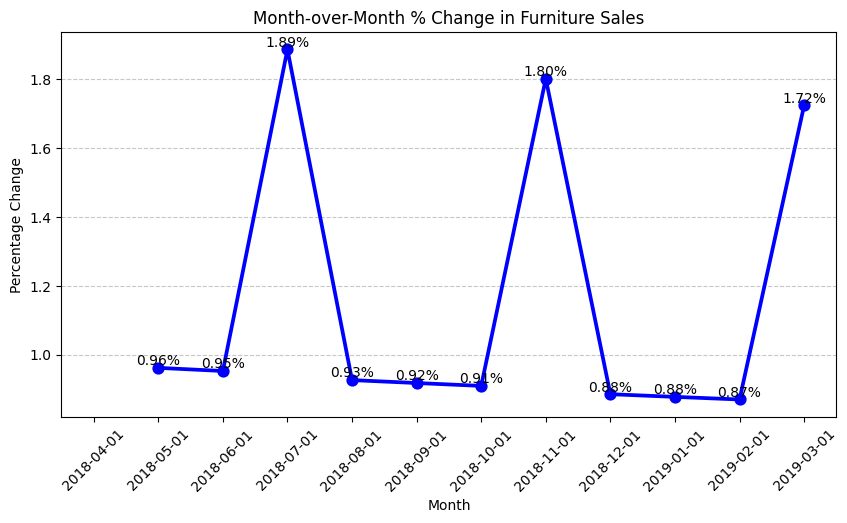

In [28]:
# point plot
plt.figure(figsize=(10, 5))
sns.pointplot(x=furniture_df['Month of Order Date'], y=furniture_df["Percentage Change"], color='blue', marker='o')

# Add values on points
for i, val in enumerate(furniture_df["Percentage Change"]):
    if not pd.isna(val):  # Skip NaN
        plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom', fontsize=10)

plt.xlabel('Month')
plt.ylabel('Percentage Change')
plt.title('Month-over-Month % Change in Furniture Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<p>Conclusion: There is high % change in every 3 months, which determines the month july, nov and march has modrate jump in target sales for the furniture category</p>

<h3>(b) Analyse the trends to identify months with significant target fluctuations.
Suggest strategies for aligning target expectations with actual performance
trends.</h3>

<h2>Target Sales Analysis</h2>
    <table>
        <tr>
            <th>Month</th>
            <th>% Change(MoM)</th>
            <th>Observation</th>
        </tr>
        <tr><td>Apr-18</td><td>-</td><td>Initial Month</td></tr>
        <tr><td>May-18</td><td>0.96%</td><td>Slight increase</td></tr>
        <tr><td>Jun-18</td><td>0.95%</td><td>Stable growth</td></tr>
        <tr><td>Jul-18</td><td>1.89%</td><td>Moderate rise</td></tr>
        <tr><td>Aug-18</td><td>0.93%</td><td>Consistent growth</td></tr>
        <tr><td>Sep-18</td><td>0.92%</td><td>Stable trend</td></tr>
        <tr><td>Oct-18</td><td>0.91%</td><td>Steady increase</td></tr>
        <tr><td>Nov-18</td><td>1.80%</td><td>Noticeable jump</td></tr>
        <tr><td>Dec-18</td><td>0.88%</td><td>Growth stabilizing</td></tr>
        <tr><td>Jan-19</td><td>0.88%</td><td>Slow but steady</td></tr>
        <tr><td>Feb-19</td><td>0.87%</td><td>Minimal change</td></tr>
        <tr><td>Mar-19</td><td>1.72%</td><td>Higher increase</td></tr>
    </table>

<ul>
    <li>Significant jumps in July-18, Nov-18, and Mar-19 (~1.8%-1.9%) indicate peak demand periods.</li>
    <li>Stable growth (~0.9%-1%) in most months, meaning the market is steady and predictable.</li>
    <li>Slower growth from Jan-19 to Feb-19 (~0.87%), possibly due to seasonal trends.</li>
</ul>

<h3>Srategies for aligning target expectations with actual performance trends.</h3>
<ol>
    <li>For Growth Months(July-18, Nov-18, Mar-19): Increase production and inventory in advance to meeting high demand and can give personalized offers to high value customers</li>
    <li>For Stable Growth Months: Maintainn stable supply chain management and experiment with pricing strategies to see if sales can be further optimized.</li>
    <li>For Slower Growth Months(Jan-Feb 2019):  Investigate reasons for slowdown like seasonal factors, competition and also launch new product to stimulate demand</li>
</ol>